In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
demo=pd.read_csv("countries.csv")
demo.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


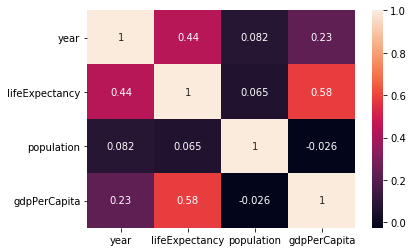

In [3]:
sns.heatmap(demo.corr(),annot=True)

In [4]:
demo2007=demo[demo.year==2007]

C:\Users\vikhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vikhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vikhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


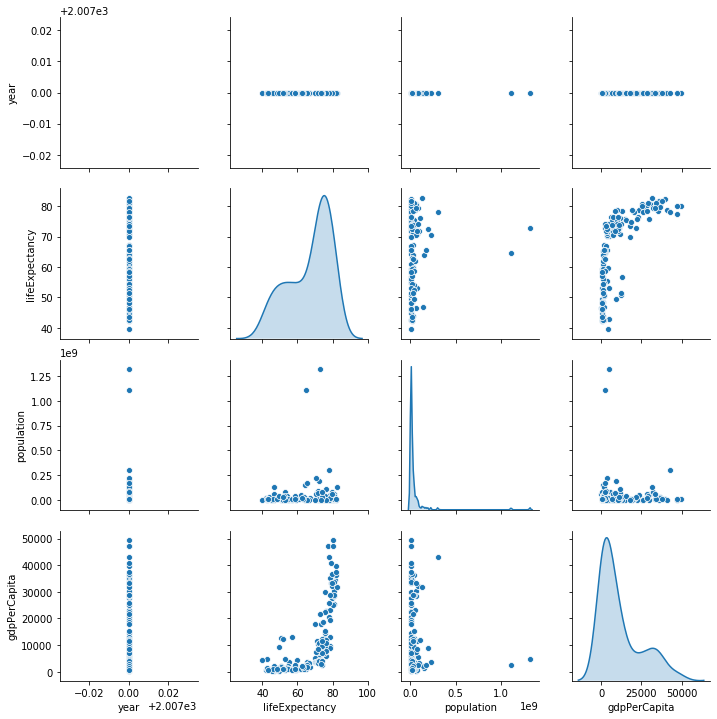

In [5]:
sns.pairplot(demo2007,diag_kind='kde')
plt.show()

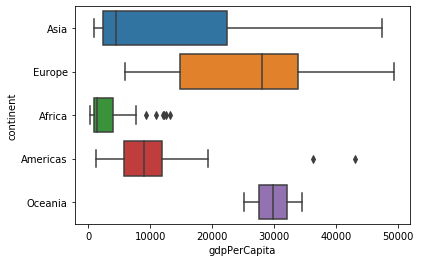

In [6]:
demo2007=demo[demo.year==2007]
sns.boxplot(x='gdpPerCapita',y='continent',data=demo2007)

#### ANOVA

In [7]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'gdpPerCapita ~ C(continent)'
model = ols(formula, demo2007).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                    sum_sq     df          F        PR(>F)
C(continent)  9.893766e+09    4.0  25.241963  1.126945e-15
Residual      1.342453e+10  137.0        NaN           NaN


In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(demo2007["gdpPerCapita"], 
                        demo2007["continent"]
                       ))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj     lower      upper    reject
-----------------------------------------------------------------
  Africa Americas   7913.999 0.0112   1253.8653 14574.1327   True
  Africa     Asia  9383.9943  0.001   3293.3942 15474.5943   True
  Africa   Europe  21965.449  0.001  15691.3136 28239.5844   True
  Africa  Oceania 26721.1557 0.0024   7001.9475 46440.3638   True
Americas     Asia  1469.9952    0.9  -5785.9882  8725.9787  False
Americas   Europe   14051.45  0.001   6640.7374 21462.1627   True
Americas  Oceania 18807.1566 0.0789  -1302.5688 38916.8821  False
    Asia   Europe 12581.4548  0.001   5678.0722 19484.8373   True
    Asia  Oceania 17337.1614 0.1204  -2591.1874 37265.5102  False
  Europe  Oceania  4755.7066    0.9 -15229.4992 24740.9124  False
-----------------------------------------------------------------


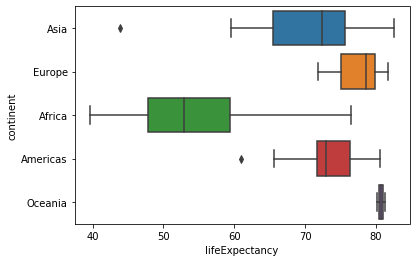

In [9]:
sns.boxplot(x='lifeExpectancy',y='continent',data=demo2007)

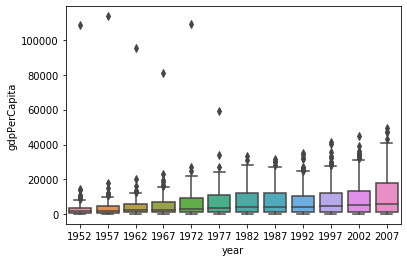

In [10]:
sns.boxplot(x='year',y='gdpPerCapita',data=demo)

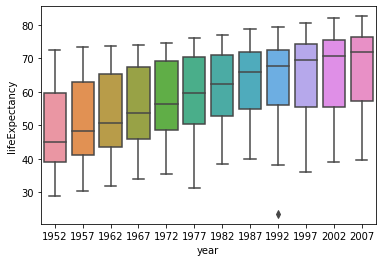

In [11]:
sns.boxplot(x='year',y='lifeExpectancy',data=demo)

In [13]:
demo[(demo.year==1952)&(demo.gdpPerCapita>80000)]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.3529
